In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os
os.environ["PROJ_LIB"] = "D:\\anaconda\\Library\\share"

from mpl_toolkits.basemap import Basemap

import matplotlib
from matplotlib.colors import rgb2hex
from matplotlib.patches import Polygon

import networkx as nx
from networkx.algorithms import community

from lxml import objectify
import pandas as pd


In [3]:
earthquake_data = pd.read_csv('materials/earthquakes.csv')

In [4]:
earthquake_data

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.2460,145.6160,Earthquake,131.60,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.8630,127.3520,Earthquake,80.00,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.5790,-173.9720,Earthquake,20.00,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.0760,-23.5570,Earthquake,15.00,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.9380,126.4270,Earthquake,15.00,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23407,12/28/2016,08:22:12,38.3917,-118.8941,Earthquake,12.30,1.2,40.0,5.6,ML,...,18.0,42.47,0.120,NaN,0.1898,NN00570710,NN,NN,NN,Reviewed
23408,12/28/2016,09:13:47,38.3777,-118.8957,Earthquake,8.80,2.0,33.0,5.5,ML,...,18.0,48.58,0.129,NaN,0.2187,NN00570744,NN,NN,NN,Reviewed
23409,12/28/2016,12:38:51,36.9179,140.4262,Earthquake,10.00,1.8,NaN,5.9,MWW,...,NaN,91.00,0.992,4.8,1.5200,US10007NAF,US,US,US,Reviewed
23410,12/29/2016,22:30:19,-9.0283,118.6639,Earthquake,79.00,1.8,NaN,6.3,MWW,...,NaN,26.00,3.553,6.0,1.4300,US10007NL0,US,US,US,Reviewed


In [5]:
# обединяваме дата и час в един показател
earthquake_data.Date + ' '+ earthquake_data.Time

0        01/02/1965 13:44:18
1        01/04/1965 11:29:49
2        01/05/1965 18:05:58
3        01/08/1965 18:49:43
4        01/09/1965 13:32:50
                ...         
23407    12/28/2016 08:22:12
23408    12/28/2016 09:13:47
23409    12/28/2016 12:38:51
23410    12/29/2016 22:30:19
23411    12/30/2016 20:08:28
Length: 23412, dtype: object

In [6]:
# обединяваме дата и час в един показател
dt_info = earthquake_data.Date + ' '+ earthquake_data.Time
# тъй като има грешни записи, в които са нанесени дата и час заедно, изчистваме записите, които са с по-голяма дължина от 20
earthquake_data = earthquake_data.drop(index = dt_info[dt_info.str.len() > 20].index)
# създаваме нава колона 'DateTime'
earthquake_data["DateTime"] = pd.to_datetime(earthquake_data.Date + " " + earthquake_data.Time)


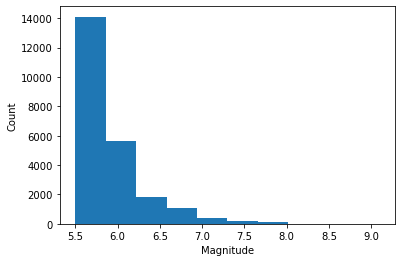

In [7]:
plt.hist(earthquake_data.Magnitude)
plt.xlabel('Magnitude')
plt.ylabel('Count')
plt.show()

In [8]:
earthquake_data[earthquake_data.Magnitude == earthquake_data.Magnitude.max()]

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status,DateTime
17083,12/26/2004,00:58:53,3.295,95.982,Earthquake,30.0,NaN,601.0,9.1,MW,...,22.0,NaN,NaN,1.17,OFFICIAL20041226005853450_30,OFFICIAL,US,OFFICIAL,Reviewed,2004-12-26 00:58:53
20501,03/11/2011,05:46:24,38.297,142.373,Earthquake,29.0,NaN,541.0,9.1,MWW,...,9.5,NaN,NaN,1.16,OFFICIAL20110311054624120_30,OFFICIAL,US,OFFICIAL,Reviewed,2011-03-11 05:46:24


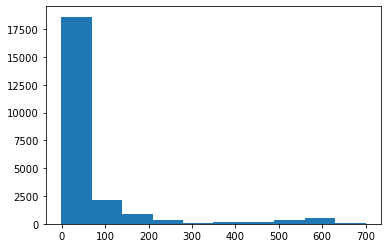

In [9]:
plt.hist(earthquake_data.Depth)
plt.show()

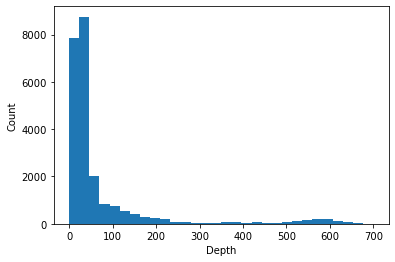

In [10]:
plt.hist(earthquake_data.Depth, bins=30)
plt.xlabel('Depth')
plt.ylabel('Count')
plt.show()

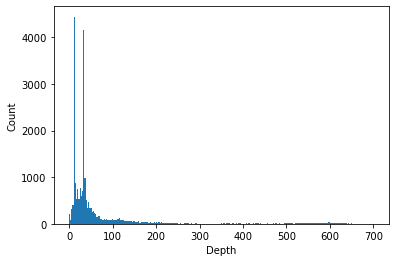

In [11]:
plt.hist(earthquake_data.Depth, bins='fd')
plt.xlabel('Depth')
plt.ylabel('Count')
plt.show()

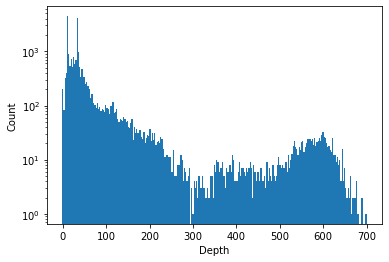

In [12]:
plt.hist(earthquake_data.Depth, bins='fd')
plt.xlabel('Depth')
plt.ylabel('Count')
plt.yscale('log')
plt.show()

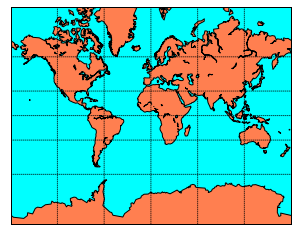

In [53]:
# Създаваме обект / инстанция на обекта
m = Basemap(projection = "merc", llcrnrlat = -80, urcrnrlat = 80,
  llcrnrlon = -180, urcrnrlon = 180)
# Чертаем границите на сушата
m.drawcoastlines()
# Оцветяваме континетите и езерета
m.fillcontinents(color = "coral", lake_color = "aqua")
# Чертаем паралели и меридиани
m.drawparallels(np.arange(-90, 91, 30))
m.drawmeridians(np.arange(-180, 181, 60))
# Оцветяваме извън континентите
m.drawmapboundary(fill_color = "aqua")
plt.show()


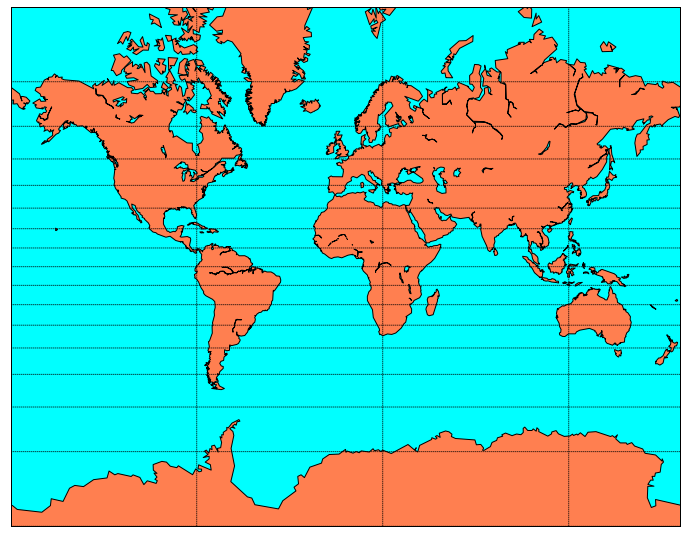

In [14]:
plt.figure(figsize=(12,15))
m = Basemap(projection = "merc", llcrnrlat = -80, urcrnrlat = 80,
  llcrnrlon = -180, urcrnrlon = 180)
m.drawcoastlines()
m.fillcontinents(color = "coral", lake_color = "aqua")
m.drawparallels(np.arange(-90, 91, 10))
m.drawmeridians(np.arange(-180, 181, 100))
m.drawmapboundary(fill_color = "aqua")
plt.show()

In [15]:
earthquake_coordinates = m(earthquake_data.Longitude.tolist(), earthquake_data.Latitude.tolist())

In [16]:
earthquake_coordinates # точките на картата в метри

([36206830.185080744,
  34175967.001145326,
  670282.7021880572,
  17395659.717718378,
  34073111.742432006,
  38543368.07842475,
  29785437.390014697,
  38496999.81584804,
  17008034.38596198,
  39861916.8976925,
  32133984.329781447,
  34020294.17714678,
  37995622.127698414,
  237512.25147207853,
  28160213.107469793,
  35553560.298658244,
  39887269.32902941,
  39480296.08914748,
  39141374.11232777,
  39557131.74727819,
  39790863.37302458,
  39360205.624920025,
  39258239.92520097,
  39205978.33428717,
  39403905.2105139,
  39359538.45567432,
  39986232.76714278,
  39137704.68147638,
  39440377.12927928,
  39039519.607483,
  39015390.31976323,
  39479184.14040463,
  15019981.228626166,
  39385891.64087979,
  39456500.38605055,
  39398679.05142252,
  39345194.316891596,
  39425921.79562227,
  39647421.98519735,
  2000618.178129986,
  39530333.782575585,
  39242672.64280111,
  39497864.87928445,
  39375884.10219416,
  2017186.2143984004,
  39637525.641386025,
  39295490.20808634,
 

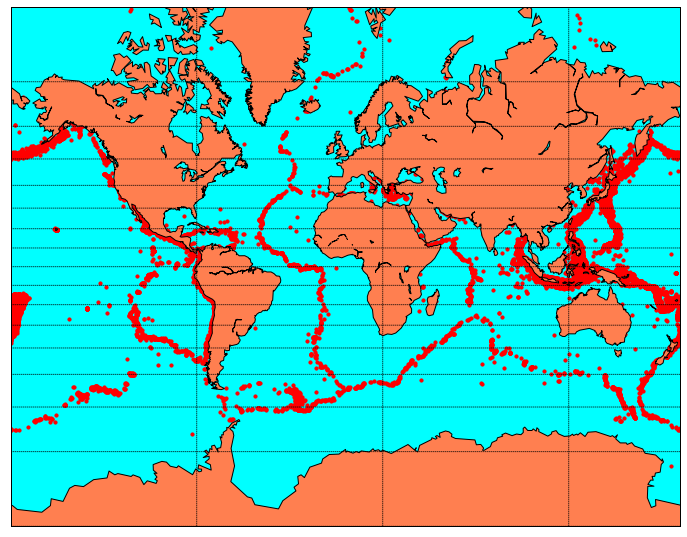

In [17]:
plt.figure(figsize=(12,15))
m = Basemap(projection = "merc", llcrnrlat = -80, urcrnrlat = 80,
  llcrnrlon = -180, urcrnrlon = 180)
m.drawcoastlines()
m.fillcontinents(color = "coral", lake_color = "aqua")
m.drawparallels(np.arange(-90, 91, 10))
m.drawmeridians(np.arange(-180, 181, 100))
m.drawmapboundary(fill_color = "aqua")

plt.scatter(earthquake_coordinates[0], earthquake_coordinates[1], c='r', s= 10)

plt.show()

In [18]:
volcanos_data = pd.read_csv('materials/volcanos.csv')

In [19]:
volcanos_data

,Number,Name,Country,Region,Type,Activity Evidence,Last Known Eruption,Latitude,Longitude,Elevation (Meters),Dominant Rock Type,Tectonic Setting
0,210010,West Eifel Volcanic Field,Germany,Mediterranean and Western Asia,Maar(s),Eruption Dated,8300 BCE,50.170,6.850,600,Foidite,Rift Zone / Continental Crust (>25 km)
1,210020,Chaine des Puys,France,Mediterranean and Western Asia,Lava dome(s),Eruption Dated,4040 BCE,45.775,2.970,1464,Basalt / Picro-Basalt,Rift Zone / Continental Crust (>25 km)
2,210030,Olot Volcanic Field,Spain,Mediterranean and Western Asia,Pyroclastic cone(s),Evidence Credible,Unknown,42.170,2.530,893,Trachybasalt / Tephrite Basanite,Intraplate / Continental Crust (>25 km)
3,210040,Calatrava Volcanic Field,Spain,Mediterranean and Western Asia,Pyroclastic cone(s),Eruption Dated,3600 BCE,38.870,-4.020,1117,Basalt / Picro-Basalt,Intraplate / Continental Crust (>25 km)
4,211001,Larderello,Italy,Mediterranean and Western Asia,Explosion crater(s),Eruption Observed,1282 CE,43.250,10.870,500,No Data,Subduction Zone / Continental Crust (>25 km)
...,...,...,...,...,...,...,...,...,...,...,...,...
1503,390130,Zavodovski,United Kingdom,Antarctica,Stratovolcano,Eruption Observed,2016 CE,-56.300,-27.570,551,Basalt / Picro-Basalt,Subduction Zone / Oceanic Crust (< 15 km)
1504,390140,Protector Seamounts,United Kingdom,Antarctica,Submarine,Eruption Observed,1962 CE,-55.912,-28.167,-55,Rhyolite,Subduction Zone / Oceanic Crust (< 15 km)
1505,390812,"Rittmann, Mount",Antarctica,Antarctica,Shield,Unrest / Pleistocene,Unknown,-73.450,165.500,2600,NaN,Intraplate / Continental Crust (>25 km)
1506,390829,James Ross Island,Antarctica,Antarctica,Shield,Evidence Credible,Unknown,-64.150,-57.750,1630,Basalt / Picro-Basalt,Intraplate / Continental Crust (>25 km)


In [20]:
volcanos_coordinates = m(volcanos_data.Longitude.tolist(), volcanos_data.Latitude.tolist())

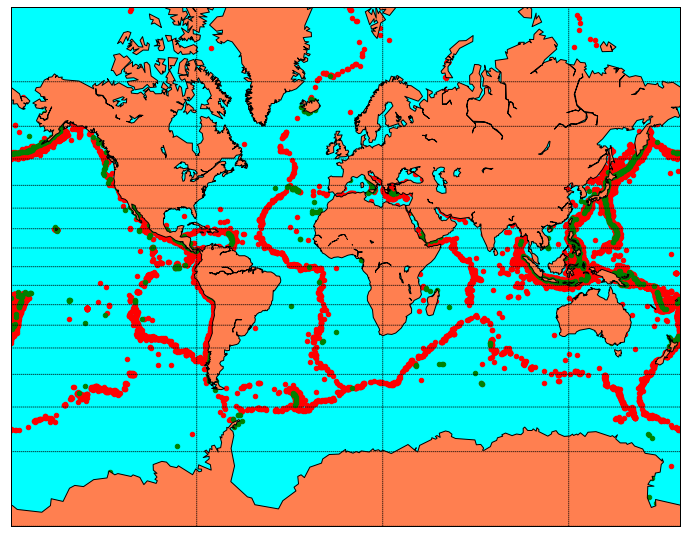

In [21]:
plt.figure(figsize=(12,15))
m = Basemap(projection = "merc", llcrnrlat = -80, urcrnrlat = 80,
  llcrnrlon = -180, urcrnrlon = 180)
m.drawcoastlines()
m.fillcontinents(color = "coral", lake_color = "aqua")
m.drawparallels(np.arange(-90, 91, 10))
m.drawmeridians(np.arange(-180, 181, 100))
m.drawmapboundary(fill_color = "aqua")

plt.scatter(earthquake_coordinates[0], earthquake_coordinates[1], c='r', s= 20)
plt.scatter(volcanos_coordinates[0], volcanos_coordinates[1], c='g', s= 20)
# може да се приложи plt contour, quiver

plt.show()

In [54]:
ufos = pd.read_csv('materials/ufo_sightings_scrubbed.csv')

D:\anaconda\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (5,9) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [55]:
ufos = pd.read_csv('materials/ufo_sightings_scrubbed.csv', low_memory=False)

In [24]:
ufos

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
0,10/10/1949 20:30,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,4/27/2004,29.8830556,-97.941111
1,10/10/1949 21:00,lackland afb,tx,NaN,light,7200,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,12/16/2005,29.38421,-98.581082
2,10/10/1955 17:00,chester (uk/england),NaN,gb,circle,20,20 seconds,Green/Orange circular disc over Chester&#44 En...,1/21/2008,53.2,-2.916667
3,10/10/1956 21:00,edna,tx,us,circle,20,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.9783333,-96.645833
4,10/10/1960 20:00,kaneohe,hi,us,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.4180556,-157.803611
...,...,...,...,...,...,...,...,...,...,...,...
80327,9/9/2013 21:15,nashville,tn,us,light,600,10 minutes,Round from the distance/slowly changing colors...,9/30/2013,36.1658333,-86.784444
80328,9/9/2013 22:00,boise,id,us,circle,1200,20 minutes,Boise&#44 ID&#44 spherical&#44 20 min&#44 10 r...,9/30/2013,43.6136111,-116.202500
80329,9/9/2013 22:00,napa,ca,us,other,1200,hour,Napa UFO&#44,9/30/2013,38.2972222,-122.284444
80330,9/9/2013 22:20,vienna,va,us,circle,5,5 seconds,Saw a five gold lit cicular craft moving fastl...,9/30/2013,38.9011111,-77.265556


In [25]:
ufos = ufos[["datetime", "country", "state", "latitude", "longitude "]]
ufos = ufos[ufos.country == "us"]

In [26]:
ufos

,datetime,country,state,latitude,longitude
0,10/10/1949 20:30,us,tx,29.8830556,-97.941111
3,10/10/1956 21:00,us,tx,28.9783333,-96.645833
4,10/10/1960 20:00,us,hi,21.4180556,-157.803611
5,10/10/1961 19:00,us,tn,36.5950000,-82.188889
7,10/10/1965 23:45,us,ct,41.1175000,-73.408333
...,...,...,...,...,...
80327,9/9/2013 21:15,us,tn,36.1658333,-86.784444
80328,9/9/2013 22:00,us,id,43.6136111,-116.202500
80329,9/9/2013 22:00,us,ca,38.2972222,-122.284444
80330,9/9/2013 22:20,us,va,38.9011111,-77.265556


In [27]:
ufos.groupby('state').size()

state
ak     319
al     642
ar     588
az    2414
ca    8912
co    1413
ct     892
dc       7
de     166
fl    3835
ga    1255
hi     262
ia     678
id     521
il    2499
in    1288
ks     613
ky     855
la     558
ma    1256
md     837
me     558
mi    1836
mn    1012
mo    1458
ms     375
mt     478
nc    1740
nd     129
ne     381
nh     486
nj    1255
nm     720
nv     803
ny    2980
oh    2275
ok     724
or    1747
pa    2366
pr      25
ri     228
sc    1003
sd     183
tn    1119
tx    3447
ut     622
va    1273
vt     260
wa    3966
wi    1232
wv     448
wy     175
dtype: int64

In [28]:
state_names = pd.read_csv('materials/states.csv')

In [29]:
state_names

,abbreviation,name
0,AK,Alaska
1,AL,Alabama
2,AR,Arkansas
3,AS,American Samoa
4,AZ,Arizona
5,CA,California
6,CO,Colorado
7,CT,Connecticut
8,DC,District of Columbia
9,DE,Delaware


In [30]:
state_names.abbreviation = state_names.abbreviation.str.lower()
state_names_dict = {state.abbreviation: state["name"] for index, state in state_names.iterrows()}
ufos.state.replace(state_names_dict, inplace = True)

In [31]:
num_sightings_by_state = ufos.groupby('state').size()

In [32]:
m = Basemap(projection = "merc", llcrnrlon = -130, llcrnrlat = 23, urcrnrlon = -64, urcrnrlat = 50)


(273,
 5,
 [-179.14734, 17.884813, 0.0, 0.0],
 [179.77847, 71.35256064399981, 0.0, 0.0],
 <matplotlib.collections.LineCollection at 0x2ba04043e50>)

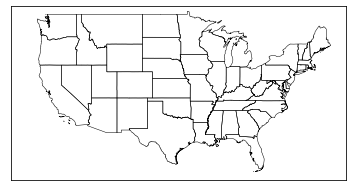

In [33]:
 m.readshapefile('materials/st99_d00', name='states')

In [34]:
m.states_info

[{'AREA': 271.254383622068,
  'PERIMETER': 227.171421517178,
  'ST99_D00_': 2,
  'ST99_D00_I': 1,
  'STATE': '02',
  'NAME': 'Alaska',
  'LSAD': '01',
  'REGION': '4',
  'DIVISION': '9',
  'LSAD_TRANS': '',
  'RINGNUM': 1,
  'SHAPENUM': 1},
 {'AREA': 0.00374851298849799,
  'PERIMETER': 0.349840468459525,
  'ST99_D00_': 3,
  'ST99_D00_I': 2,
  'STATE': '02',
  'NAME': 'Alaska',
  'LSAD': '01',
  'REGION': '4',
  'DIVISION': '9',
  'LSAD_TRANS': '',
  'RINGNUM': 1,
  'SHAPENUM': 2},
 {'AREA': 0.00149949982799957,
  'PERIMETER': 0.153532820266569,
  'ST99_D00_': 4,
  'ST99_D00_I': 3,
  'STATE': '02',
  'NAME': 'Alaska',
  'LSAD': '01',
  'REGION': '4',
  'DIVISION': '9',
  'LSAD_TRANS': '',
  'RINGNUM': 1,
  'SHAPENUM': 3},
 {'AREA': 0.0313000839335011,
  'PERIMETER': 0.71222623089465,
  'ST99_D00_': 5,
  'ST99_D00_I': 4,
  'STATE': '02',
  'NAME': 'Alaska',
  'LSAD': '01',
  'REGION': '4',
  'DIVISION': '9',
  'LSAD_TRANS': '',
  'RINGNUM': 1,
  'SHAPENUM': 4},
 {'AREA': 0.88933881264201

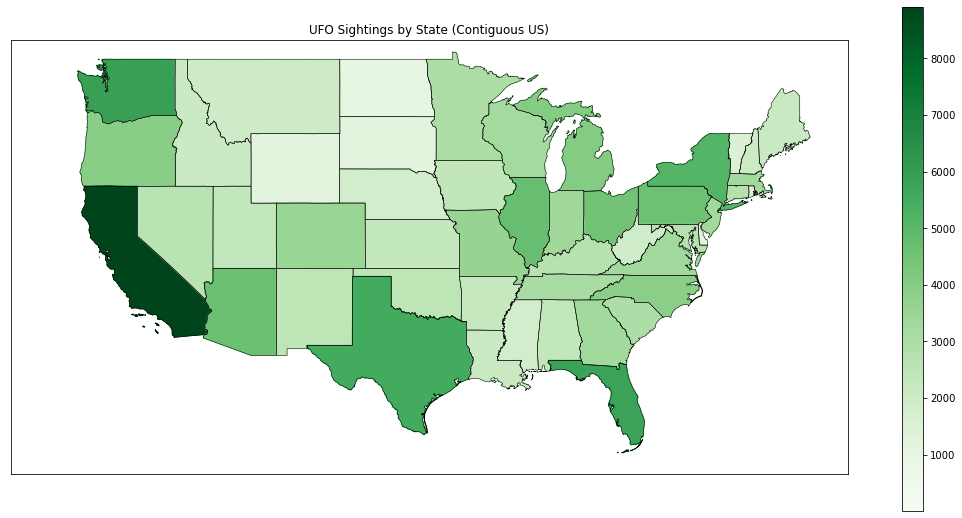

In [35]:
fig = plt.figure(figsize = (15, 10))
m = Basemap(projection = "merc", llcrnrlon = -130, llcrnrlat = 23,  urcrnrlon = -64, urcrnrlat = 50)
us_info = m.readshapefile("materials/st99_d00", "states", drawbounds = True)
colors = {}
state_names = []
cmap = plt.cm.Greens
vmin = num_sightings_by_state.min()
vmax = num_sightings_by_state.max()

for shape_dict in m.states_info:
    state_name = shape_dict["NAME"]
    # Skip DC and Puerto Rico
    if state_names not in ["District of Columbia", "Puerto Rico"]:
        sightings = num_sightings_by_state[ num_sightings_by_state.index == state_name][0]
        colors[state_name] = cmap(np.sqrt((sightings - vmin) / (vmax - vmin)))[:3]
        state_names.append(state_name)

ax = plt.gca()
for nshape, seg in enumerate(m.states):
    # Skip DC and Puerto Rico
    if state_names[nshape] not in ["District of Columbia", "Puerto Rico"]:
        color = rgb2hex(colors[state_names[nshape]])
        poly = Polygon(seg, facecolor = color, edgecolor = color)
        ax.add_patch(poly)
        
plt.title("UFO Sightings by State (Contiguous US)")
colorbar_ax = fig.add_axes([0.95, 0.15, 0.02, 0.7])
matplotlib.colorbar.ColorbarBase(colorbar_ax, cmap = cmap,
  norm = matplotlib.colors.Normalize(vmin, vmax))
plt.show()



In [36]:
g = nx.Graph() # ненасочен граф
g.add_edge("a", "b", weight = 0.1)
g.add_edge("b", "c", weight = 1.5)
g.add_edge("a", "c", weight = 1.0)
g.add_edge("c", "d", weight = 2.2)


In [37]:
g.nodes

NodeView(('a', 'b', 'c', 'd'))

In [38]:
g.edges

EdgeView([('a', 'b'), ('a', 'c'), ('b', 'c'), ('c', 'd')])

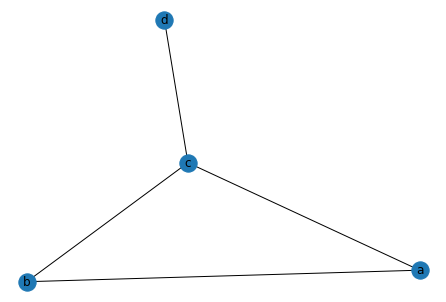

In [39]:
nx.draw(g, with_labels=True)
plt.show()

In [40]:
nx.shortest_path(g, 'b', 'd')

['b', 'c', 'd']

In [41]:
nx.shortest_path_length(g, 'b', 'd')

2

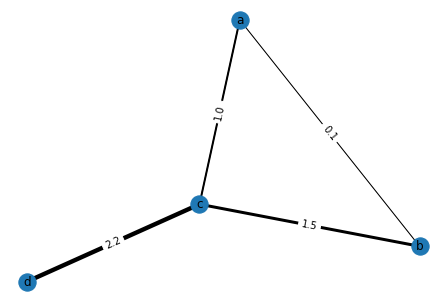

In [42]:
pos = nx.spring_layout(g)
weights = nx.get_edge_attributes(g, "weight")
nx.draw(g, pos, with_labels = True)
nx.draw_networkx_edge_labels(g, pos, edge_labels = weights)
nx.draw_networkx_edges(g, pos, width = [v * 2 for v in weights.values()])
plt.show()
# лейаута слуед всяхо изпълнение променя разположението си, защото местоположението на точките е без значение

In [43]:
pos # променят се след всяко изпълнение на горният лейаут

{'a': array([0.0764364, 1.       ]),
 'b': array([ 0.82466477, -0.34649488]),
 'c': array([-0.09124998, -0.09632402]),
 'd': array([-0.80985119, -0.5571811 ])}

In [44]:
nx.shortest_path(g, 'b', 'd', weight='weight')

['b', 'a', 'c', 'd']

In [45]:
nx.shortest_path(g, 'b', 'd')

['b', 'c', 'd']

In [46]:
nx.shortest_path_length(g, 'b', 'd', weight='weight')

3.3000000000000003

In [47]:
nx.shortest_path_length(g, 'b', 'd')

2

In [48]:
gd = nx.DiGraph() # насочен граф
gd.add_edge("a", "b", weight = 0.1)
gd.add_edge("b", "c", weight = 1.5)
gd.add_edge("a", "c", weight = 1.0)
gd.add_edge("c", "d", weight = 2.2)

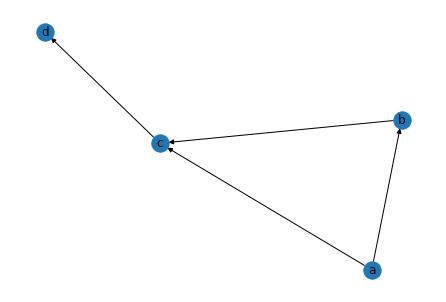

In [49]:
nx.draw(gd, with_labels=True)
plt.show()

In [50]:
nx.shortest_path(gd, 'b', 'd')

['b', 'c', 'd']

In [51]:
nx.shortest_path_length(gd, 'b', 'd')

2

In [52]:
nx.shortest_path(gd, 'b', 'a') # това дава грешка, защото път от в до а нямя

NetworkXNoPath: No path between b and a.

In [56]:
facebook_graph = nx.read_edgelist('materials/facebook_combined.txt')


In [57]:
len(facebook_graph.nodes), len(facebook_graph.edges)

(4039, 88234)

In [58]:
karate_graph = nx.karate_club_graph()

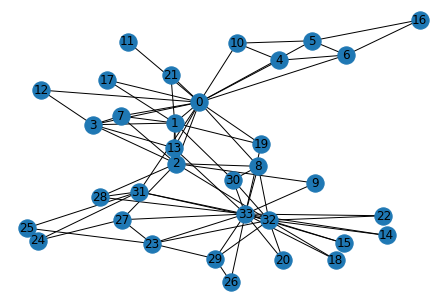

In [59]:
nx.draw(karate_graph, with_labels= True)

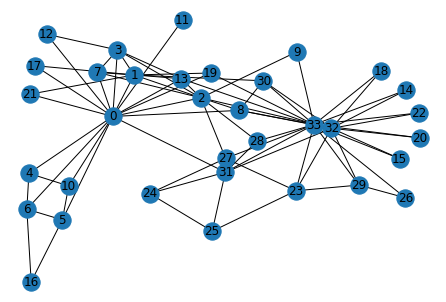

In [60]:
nx.draw_spring(karate_graph, with_labels= True) # по подразбиране

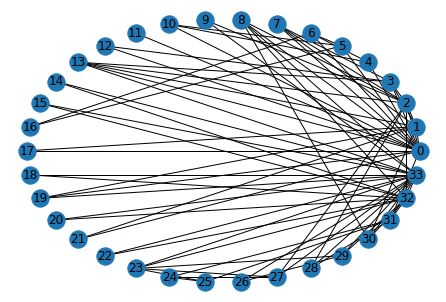

In [61]:
nx.draw_circular(karate_graph, with_labels= True)

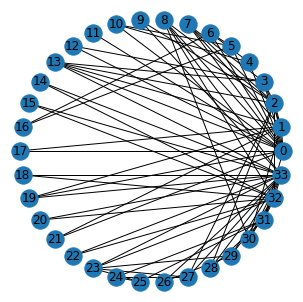

In [62]:
nx.draw_circular(karate_graph, with_labels= True)
plt.gca().set_aspect('equal')
plt.show()

In [63]:
nx.shortest_path(karate_graph, 17, 0)

[17, 0]

In [64]:
nx.shortest_path(karate_graph, 17, 21)

[17, 0, 21]

In [65]:
[nx.shortest_path(karate_graph, 17, other) for other in list(karate_graph.nodes)]

[[17, 0],
 [17, 1],
 [17, 0, 2],
 [17, 0, 3],
 [17, 0, 4],
 [17, 0, 5],
 [17, 0, 6],
 [17, 0, 7],
 [17, 0, 8],
 [17, 0, 2, 9],
 [17, 0, 10],
 [17, 0, 11],
 [17, 0, 12],
 [17, 0, 13],
 [17, 0, 2, 32, 14],
 [17, 0, 2, 32, 15],
 [17, 0, 5, 16],
 [17],
 [17, 0, 2, 32, 18],
 [17, 0, 19],
 [17, 0, 2, 32, 20],
 [17, 0, 21],
 [17, 0, 2, 32, 22],
 [17, 0, 31, 25, 23],
 [17, 0, 31, 24],
 [17, 0, 31, 25],
 [17, 0, 8, 33, 26],
 [17, 0, 2, 27],
 [17, 0, 2, 28],
 [17, 0, 2, 32, 29],
 [17, 1, 30],
 [17, 0, 31],
 [17, 0, 2, 32],
 [17, 0, 8, 33]]

In [66]:
centrality = nx.betweenness_centrality(karate_graph)

In [67]:
centrality

{0: 0.43763528138528146,
 1: 0.053936688311688304,
 2: 0.14365680615680618,
 3: 0.011909271284271283,
 4: 0.0006313131313131313,
 5: 0.02998737373737374,
 6: 0.029987373737373736,
 7: 0.0,
 8: 0.05592682780182781,
 9: 0.0008477633477633478,
 10: 0.0006313131313131313,
 11: 0.0,
 12: 0.0,
 13: 0.04586339586339586,
 14: 0.0,
 15: 0.0,
 16: 0.0,
 17: 0.0,
 18: 0.0,
 19: 0.03247504810004811,
 20: 0.0,
 21: 0.0,
 22: 0.0,
 23: 0.017613636363636363,
 24: 0.0022095959595959595,
 25: 0.0038404882154882154,
 26: 0.0,
 27: 0.02233345358345358,
 28: 0.0017947330447330447,
 29: 0.0029220779220779218,
 30: 0.014411976911976909,
 31: 0.13827561327561325,
 32: 0.145247113997114,
 33: 0.30407497594997596}

level 1 ({0, 1, 3, 4, 5, 6, 7, 10, 11, 12, 13, 16, 17, 19, 21}, {2, 8, 9, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33})
level 2 ({0, 1, 3, 4, 5, 6, 7, 10, 11, 12, 13, 16, 17, 19, 21}, {32, 33, 2, 8, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31}, {9})
level 3 ({0, 1, 3, 7, 11, 12, 13, 17, 19, 21}, {32, 33, 2, 8, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31}, {4, 5, 6, 10, 16}, {9})
level 4 ({0, 1, 3, 7, 11, 12, 13, 17, 19, 21}, {2, 24, 25, 27, 28, 31}, {4, 5, 6, 10, 16}, {32, 33, 8, 14, 15, 18, 20, 22, 23, 26, 29, 30}, {9})
level 5 ({0, 1, 3, 7, 12, 13, 17, 19, 21}, {2, 24, 25, 27, 28, 31}, {4, 5, 6, 10, 16}, {32, 33, 8, 14, 15, 18, 20, 22, 23, 26, 29, 30}, {9}, {11})
level 6 ({0, 1, 3, 7, 12, 13, 17, 19, 21}, {2, 24, 25, 27, 28, 31}, {4, 5, 6, 10, 16}, {32, 33, 8, 14, 15, 18, 20, 22, 23, 29, 30}, {9}, {11}, {26})
level 7 ({0, 1, 3, 7, 13, 17, 19, 21}, {2, 24, 25, 27, 28, 31}, {4, 5, 6, 10, 16}, {32, 33, 8, 14, 15, 18, 20, 22, 23, 29, 30}, {9}, {11

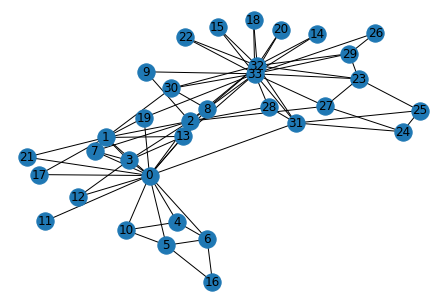

In [68]:
nx.draw(karate_graph, with_labels = True) 
communities_generator = community.girvan_newman(karate_graph)
for i in range(1, 10):
    communities = next(communities_generator) # това са общностите
    print("level " + str(i), communities)


In [69]:


xml_data = objectify.parse('ESMS_0271_NSI_marketpricesofdwellings_2012-N1_SDMX.2.1.xml')  # Parse XML data
root = xml_data.getroot()  # Root element

data = []
cols = []
for i in range(len(root.getchildren())):
    child = root.getchildren()[i]
    data.append([subchild.text for subchild in child.getchildren()])
    cols.append(child.tag)

df = pd.DataFrame(data).T  # Create DataFrame and transpose it
# df.columns = cols  # Update column names
print(cols)

['{http://www.sdmx.org/resources/sdmxml/schemas/v2_1/message}Header', '{http://www.sdmx.org/resources/sdmxml/schemas/v2_1/message}MetadataSet']
